In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
## Import Kevin

In [8]:
## Import Vicente

In [9]:
titanic_df = pd.read_csv('tested.csv')

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


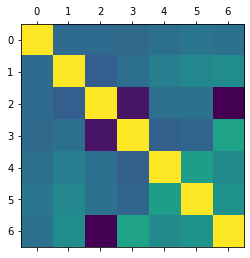

In [11]:
corr_df = titanic_df.corr(method='pearson')
plt.matshow(corr_df)
plt.show()

In [ ]:
# Kevin Webin